# Laboratorio 4: Principio del Máximo de Pontryagin

**Nombres:** Sebastián Acuña U. y Jesús Sayes B. <br>
**Fecha:** 9 de octubre de 2024 <br>
**Profesor:** Héctor Ramírez C. <br>
**Auxiliar:** Diego Olguín W. <br>
**Ayudantes:** Carlos Antil C. y Luis Fuentes C. <br>
**Curso:** [MA4703-1] Control Óptimo: Teoría y Laboratorio

In [1]:
# Librerías a utilizar

using LinearAlgebra
using Plots
using LaTeXStrings
using JuMP
using Ipopt
using NLPModelsIpopt
using DifferentialEquations
using OptimalControl

## Ejercicio 1

Primeramente enunciamos el Principio del Máximo de Pontryagin para un problema tipo Lagrange:

***Teorema:** Sea $u(\cdot)$ solución del problema tipo Lagrange. Entonces, existe $p(\cdot) : [0,T] \to \mathbb{R}^n$ absolutamente continua tal que:
\begin{align*}
\dot{x}(t) &= \frac{\partial H}{\partial p} (t, x(t), u(t), p(t)) \quad \text{c.t.p.} \quad t \in [0,T]; \quad x(0) = x_0, \\
\dot{p}(t) &= -\frac{\partial H}{\partial x} (t, x(t), u(t), p(t)) \quad \text{c.t.p.} \quad t \in [0,T]; \quad p(T) = 0,
\end{align*}
y
\begin{equation*}
H(x(t), u(t), p(t)) = \min_{\omega \in U} H(x(t), \omega, p(t)),
\end{equation*}
donde $H(x,u,p) := \ell(x,u) + p^\top f(x,u)$ es el Hamiltoniano del problema.*

En el caso de nuestro problema, omitiendo la dependencia temporal para aliviar la notación, tenemos que:
\begin{align*}
&\ell(x,u) = z^2 + I^2 + u^2 \\
&p^\top f(x,u) = (p_S, p_I, p_R, p_{\gamma}, p_z) \begin{pmatrix} −\beta(\gamma,z)SI \\ \beta(\gamma,z)SI−\alpha I \\ \alpha I \\ u \\ k_1​(1−\gamma)−k_2​ z\end{pmatrix}
\end{align*}

Por lo que el Hamiltoniano del problema queda:
\begin{equation*}
H = z^2 + I^2 + u^2 + p_S \left( -\beta(\gamma, z) S I \right) + p_I \left( \beta(\gamma, z) S I - \alpha I \right) + p_R \alpha I + p_\gamma u + p_z \left( k_1 (1 - \gamma) - k_2 z \right)
\end{equation*}

Luego, calculando las derivadas con respecto a los estados de la dinámica original se tiene que:
\begin{align*}
    \frac{\partial H}{\partial S} &= - p_S \beta(\gamma, z) I + p_I \beta(\gamma, z) I, \\
    \frac{\partial H}{\partial I} &= 2 I - p_S \beta(\gamma, z) S + p_I \left( \beta(\gamma, z) S - \alpha \right) + p_R \alpha, \\
    \frac{\partial H}{\partial R} &= 0, \\
    \frac{\partial H}{\partial \gamma} &= -p_S S I \frac{\partial \beta}{\partial \gamma}(\gamma, z) + p_I S I \frac{\partial \beta}{\partial \gamma}(\gamma, z) - p_z k_1, \\
    \frac{\partial H}{\partial z} &= 2z - p_S S I \frac{\partial \beta}{\partial z}(\gamma, z) + p_I S I \frac{\partial \beta}{\partial z}(\gamma, z) - p_z k_2.
\end{align*}

Sabemos además que: 
\begin{equation*}
\beta(\gamma, z) = \beta_1 + \beta_2 \left( \gamma + \eta \frac{k_1}{k_2} z \right)
\end{equation*}

Por lo que:
\begin{align*}
\frac{\partial \beta}{\partial \gamma}(\gamma, z) &= \beta_2 \\
\frac{\partial \beta}{\partial z}(\gamma, z) &= \beta_2 \eta \frac{k_1}{k_2}
\end{align*}

Reemplazando en las ecuaciones anteriores tenemos que:
\begin{align*}
    \frac{\partial H}{\partial S} &= - p_S \beta(\gamma, z) I + p_I \beta(\gamma, z) I, \\
    \frac{\partial H}{\partial I} &= 2 I - p_S \beta(\gamma, z) S + p_I \left( \beta(\gamma, z) S - \alpha \right) + p_R \alpha, \\
    \frac{\partial H}{\partial R} &= 0, \\
    \frac{\partial H}{\partial \gamma} &= -p_S S I \beta_2 + p_I S I \beta_2 - p_z k_1, \\
    \frac{\partial H}{\partial z} &= 2z - p_S S I \beta_2 \eta \frac{k_1}{k_2} + p_I S I \beta_2 \eta \frac{k_1}{k_2} - p_z k_2.
\end{align*}

Finalmente, en virtud del Principio del Máximo de Pontryagin tenemos que: 
$$
\dot{p}(t) = -\frac{\partial H}{\partial x} (t, x(t), u(t), p(t))
$$

Con ello, y reagrupando algunas ecuaciones, se concluye que el sistema dinámico adjunto queda expresado por las ecuaciones siguientes:

\begin{align*}
    \dot{p}_S &= p_S \beta(\gamma, z) I - p_I \beta(\gamma, z), \\
    \dot{p}_I &= p_S \beta(\gamma, z) S - p_I(\beta(\gamma, z) S - \alpha) - p_R \alpha - 2 I, \\
    \dot{p}_R &= 0, \\
    \dot{p}_\gamma &= -(p_I - p_S) S I \beta_2 + p_z k_1, \\
    \dot{p}_z &= -(p_I - p_S) S I \beta_2 \frac{\eta k_1}{k_2} + p_z k_2 - 2 z,
\end{align*}

con condición final $p(T) = (p_S(T), p_I(T), p_R(T), p_{\gamma}(T), p_z(T)) = 0$.

## Ejercicio 2

In [2]:
# Control óptimo u*
function u_opt(p_gamma)
    - p_gamma/2
end

u_opt (generic function with 1 method)

## Ejercicio 3

In [3]:
# Parámetros del modelo
beta_1, beta_2 = 1.2, 0.2
α = 0.5
k_1, k_2 = 0.4, 0.01
η = 0.5
T = 10.0

# Condiciones iniciales
S_0, I_0, R_0, gamma_0, z_0 = 0.9, 0.1, 0.0, 0.8, 0.1
x0 = [S_0, I_0, R_0, gamma_0, z_0]

# Función beta
function beta(gamma, z)
    return beta_1 + beta_2 * (gamma + η * k_1 / k_2 * z)
end

# Sistema dinámico acoplado v = (x, p)
function sistema_acoplado!(dv, v, t)
    S, I, R, gamma, z, p_S, p_I, p_R, p_gamma, p_z = v

    # Ecuaciones de los estados
    dv[1] = -beta * S * I  # dS(t)
    dv[2] = beta * S * I - α * I  # dI(t)
    dv[3] = α * I  # dR(t)
    dv[4] = u_opt(p_gamma)  # dgamma(t)
    dv[5] = k_1 * (1 - gamma) - k_2 * z  # dz(t)

    # Ecuaciones de los estados adjuntos
    dv[6] = p_S * beta(gamma, z) * I - p_I * beta(gamma, z) * I  # dp_S(t)
    dv[7] = p_S * beta(gamma, z) * S - p_I * (beta(gamma, z) * S - α) - p_R * α - 2 * I  # dp_I(t)
    dv[8] = 0  # dp_R(t)
    dv[9] = -(p_I - p_S) * S * I * beta_2 - p_gamma  # dp_gamma(t)
    dv[10] = -(p_I - p_S) * S * I * beta_2 * η * k_1 / k_2 + k_2 * p_z - 2 * z  # dp_z(t)
end

sistema_acoplado! (generic function with 1 method)

## Ejercicio 4

In [4]:
function loss_objective(p0)
    p_0 = [p0[i] for i in 1:5]
    tspan = (0.0 , 10)
    v0 = vcat(x0 , p_0)
    prob = ODEProblem(sistema_acoplado!, v0, tspan,0)
    sol = solve(prob)
    return sol(T)[6]^2 + sol(T)[7]^2 + sol(T)[8]^2 + sol(T)[9]^2 + sol(T)[10]^2
end

loss_objective (generic function with 1 method)

In [5]:
loss_objective([1,1,1,1,1])

LoadError: BoundsError: attempt to access Int64 at index [2]

In [6]:
start_value = [1,1,1,1,1]

obj(args...) = loss_objective(args)

model = JuMP.Model(Ipopt.Optimizer)

JuMP.register(model, :obj, 5, obj, autodiff=true)

@variable(model, p0[i=1:5], start = start_value[i])
@NLobjective(model, Min, obj(p0...))

JuMP.optimize!(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0



LoadError: BoundsError: attempt to access Int64 at index [2]

In [7]:
valor_optimo_p0 = value.(p0)

┌ Warning: The model has been modified since the last call to `optimize!` (or `optimize!` has not been called yet). If you are iteratively querying solution information and modifying a model, query all the results first, then modify the model.
└ @ JuMP ~/.julia/packages/JuMP/W1IDA/src/optimizer_interface.jl:1085


LoadError: OptimizeNotCalled()

In [8]:
tspan = (0.0 , 10)
v0 = vcat(x0 , valor_optimo_p0)
prob = ODEProblem(sistema_acoplado!, v0, tspan,0)
sol = solve(prob)

LoadError: UndefVarError: `valor_optimo_p0` not defined

In [9]:
x_1 = t -> sol(t)[1]
x_2 = t -> sol(t)[2]
x_3 = t -> sol(t)[3]
x_4 = t -> sol(t)[4]
x_5 = t -> sol(t)[5]

dt = range(0 , 10 , 1000)

plot(dt , x_1.(dt), label = "S(t)")
plot!(dt , x_2.(dt), label = "I(t)")
plot!(dt , x_3.(dt), label = "R(t)")
plot!(dt , x_4.(dt), label = "gamma(t)")
plot!(dt , x_5.(dt), label = "z(t)")

LoadError: UndefVarError: `sol` not defined

In [10]:
u = t -> - sol(t)[9]/2

dt = range(0 , 10 , 1000)

plot(dt , u.(dt), label = "control optimo")

LoadError: UndefVarError: `sol` not defined

Al implementar la medida optima se espera que todas las personas se contagien, o una cantidad muy cercana a 1, pero con un peak de infectados de 0.4 (o el 40% de la poblacion).

## Ejercicio 5

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     9759
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2008

Total number of variables............................:     1757
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1255
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1757
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 8.00e-01 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

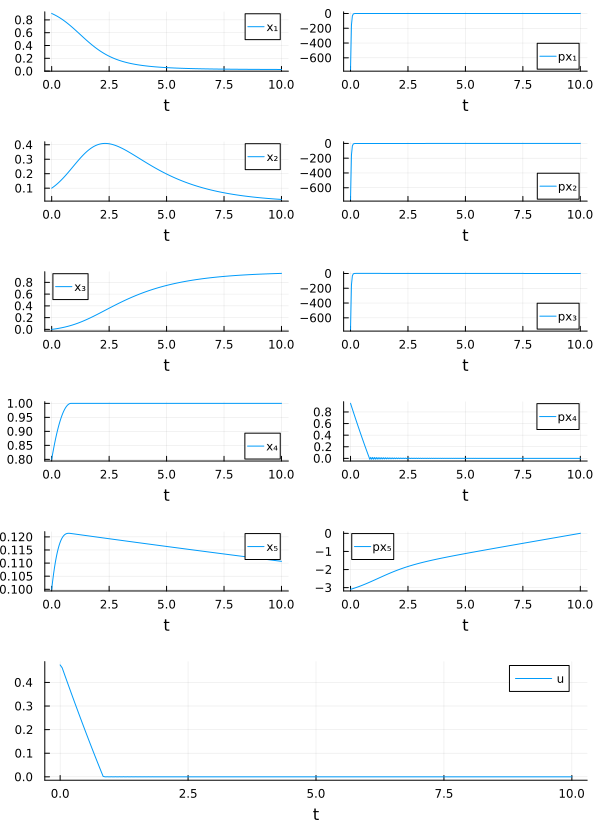

In [11]:
OpCo = @def begin
    t ∈ [0,10], time
    x ∈ R^5, state
    u ∈ R, control
    
    x(0) == [0.9 , 0.1 , 0.0 , 0.8 , 0.1]
    
    0 <= x1(t) <= 1
    0 <= x2(t) <= 1
    0 <= x3(t) <= 1
    0 <= x4(t) <= 1
    0 <= x5(t) <= 1
    
    x1(t) + x2(t) + x3(t) == 1
    ẋ(t) == [ -beta( x4(t) , x5(t) )*x1(t)*x2(t),
            beta( x4(t) , x5(t) )*x1(t)*x2(t) - 0.5* x2(t),
            0.5 * x2(t),
            u(t),
            0.4*(1 - x4(t)) - 0.01*x5(t)]
    
    ∫( x5(t)^2 + x2(t)^2 + u(t)^2) → min
end

sol = solve(OpCo)

plot(sol)

## Ejercicio 6

Notamos que los graficos tanto del ejercicio 4 y 5, en el caso de las funciones $R$, $I$ y $S$ son muy similares, ademas el control obtenido en los 2 ejercicios es muy similar, solamente que el de `OptimalControl` parece ser mas rápido, ademas como código el ejercicio 5 fue mas rápido en su ejecución, preferimos el uso de `OptimalControl` para este tipo de problemas.